# Polarimetic SAR Change Detection

##Introduction
The Docker container __mort/sardocker__  provides easy access to Python scripts for analysis of polarimetric synthetic aperture radar (polSAR) imagery. These scripts are described in <a href="http://www.amazon.com/Analysis-Classification-Change-Detection-Sensing/dp/1466570377/ref=dp_ob_title_bk">Canty(2014), Image analysis, Classification and Change Detection in Remote Sensing, 3rd Revised Ed.</a> In addition to scripts for polSAR change detection, the container encapsulates the command line interface of the <a href="https://www.asf.alaska.edu/data-tools/mapready/ ">ASF MapReady</a> software for terrain correction and geocoding of SAR images. The user interacts with the software in an IPython notebook served from within the Docker container.

##Software Installation
On 64-bit Ubuntu Linux:
 1. <a href="https://docs.docker.com/installation/ubuntulinux/">install Docker</a>
 2. In a terminal, run the command<br />
      __sudo docker run -d -p 433:8888 --name=sar -v *your_image_directory*:/sar/imagery mort/sardocker__<br />
     where *your_image_directory* is the path to your SAR data. 
 3. Point your browser to<br /> 
    __localhost:433__
 4. Click on this tutorial, or open a new notebook with __New/Python 2__.
 
On WIndows (or Mac), <a href="https://docs.docker.com/installation/windows/">install boot2docker</a>, share your image directory with VirtualBox and proceed from step 2. above.

Here is a listing of the main directory __/sar__ in the container:

In [4]:
ls -l /sar

total 3904
-rwxrwxrwx 1 root root   11115 May 27 11:03 dispms.py*
-rwxrwxrwx 1 root root    7746 Jun 16 08:17 enlml.py*
drwxrwxrwx 1 root root   28672 Jun 16 07:54 imagery/
-rwxrwxrwx 1 root root    4399 Jun 16 08:17 ingest.py*
-rwxr-xr-x 1 root root    8072 May 22 13:19 libprov_means.so*
-rwxrwxrwx 1 root root    2509 Jun 16 08:17 mapready.sh*
-rwxrwxrwx 1 root root     693 May 17 14:58 prov_means.c*
-rwxrwxrwx 1 root root     831 Jun 15 17:04 radarsat2quadpol.template*
-rwxrwxrwx 1 root root    8636 Jun 10 12:55 register.py*
-rwxrwxrwx 1 root root     815 Jun 12 07:53 terrasarxdualpol.template*
-rwxrwxrwx 1 root root 3879429 Jun 16 12:33 tutorial.ipynb*
-rwxrwxrwx 1 root root      50 Jun 10 11:14 utm.prj*
-rwxrwxrwx 1 root root   10208 Jun 15 19:03 wishart.py*
-rwxrwxrwx 1 root root     801 Jun 15 18:58 wishart.sh*


The imagery directory contains the polSAR data and is shared with the host. In the present case there are several Radarsat-2 quadpol images in SLC (single-look complex) format along with a dem (digital elevation model). Acquistion times range from May 25, 2009 (20090525) to October 11, 2010 (20101011):

In [6]:
ls -l /sar/imagery

total 4
drwxrwxrwx 1 root root    0 Jun 15 10:32 RS2_OK5491_PK71074_DK68879_FQ21_20090525_172447_HH_VV_HV_VH_SLC/
drwxrwxrwx 1 root root    0 Jun 15 17:11 RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC/
drwxrwxrwx 1 root root 4096 Jun 15 17:11 RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC/
drwxrwxrwx 1 root root    0 Jun 15 09:30 RS2_OK5491_PK71074_DK68879_FQ21_20100707_172459_HH_VV_HV_VH_SLC/
drwxrwxrwx 1 root root    0 Jun 15 09:29 RS2_OK5491_PK71074_DK68879_FQ21_20100731_172501_HH_VV_HV_VH_SLC/
drwxrwxrwx 1 root root    0 Jun 11 14:52 RS2_OK5491_PK71074_DK68879_FQ21_20100824_172503_HH_VV_HV_VH_SLC/
drwxrwxrwx 1 root root    0 Jun 11 14:52 RS2_OK5491_PK71074_DK68879_FQ21_20101011_172507_HH_VV_HV_VH_SLC/
drwxrwxrwx 1 root root    0 Jun 11 14:52 RS2_OK5491_PK71075_DK68880_FQ21_20090618_172447_HH_VV_HV_VH_SLC/
drwxrwxrwx 1 root root    0 Jun 11 14:52 RS2_OK5491_PK71077_DK68882_FQ21_20090805_172450_HH_VV_HV_VH_SLC/
drwxrwxrwx 1 root root    0 Jun 11 14:

The images are level one SLC (single look complex format). For example, here are the contents of the image directory corresponding to acquistion date 20100426 (April 26, 2010):

In [1]:
ls -l /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC/

total 336230
-rwxrwxrwx 1 root root   741610 Apr 27  2010 BrowseImage.tif*
-rwxrwxrwx 1 root root    44218 Oct  2  2009 DFAIT_RS2 EULA_Single User License.pdf*
-rwxrwxrwx 1 root root      623 Jun 15 16:12 GEARTH_POLY.kml*
drwxrwxrwx 1 root root        0 Jun 17 08:40 T3/
-rwxrwxrwx 1 root root    89600 Apr 28  2010 Thumbs.db*
-rwxrwxrwx 1 root root 85731468 Apr 27  2010 imagery_HH.tif*
-rwxrwxrwx 1 root root 85731468 Apr 27  2010 imagery_HV.tif*
-rwxrwxrwx 1 root root 85731468 Apr 27  2010 imagery_VH.tif*
-rwxrwxrwx 1 root root 85731468 Apr 27  2010 imagery_VV.tif*
-rwxrwxrwx 1 root root    49475 Apr 27  2010 lutBeta.xml*
-rwxrwxrwx 1 root root    49475 Apr 27  2010 lutGamma.xml*
-rwxrwxrwx 1 root root    49475 Apr 27  2010 lutSigma.xml*
-rwxrwxrwx 1 root root   119099 Apr 27  2010 product.xml*
-rwxrwxrwx 1 root root   160314 Jun 15 16:12 product_header.txt*
-rwxrwxrwx 1 root root    15152 Jun 15 16:12 product_lut.bin*
-rwxrwxrwx 1 root root    49765 Jun 15 16:12 product_lut.txt*
-rwxrw

The four polarization combinations HH, HV,VH and VV are are stored as complex numbers in GeoTiff format. The subdirectory T3 contains the polarimetric coherency matrix elements generated from the polarization combinations by the PolSARpro software. This is discussed below in the Section on the processing chain. The image files are now in ENVI format. There is also an RGB colour Pauli decomposition image in BMP format:

In [5]:
ls -l /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC/T3

total 66521
-rwxrwxrwx 1 root root 5231574 Jun 15 16:14 PauliRGB.bmp*
-rwxrwxrwx 1 root root 6986432 Jun 15 16:14 T11.bin*
-rwxrwxrwx 1 root root     247 Jun 15 16:14 T11.bin.hdr*
-rwxrwxrwx 1 root root 6986432 Jun 15 16:14 T12_imag.bin*
-rwxrwxrwx 1 root root     252 Jun 15 16:14 T12_imag.bin.hdr*
-rwxrwxrwx 1 root root 6986432 Jun 15 16:14 T12_real.bin*
-rwxrwxrwx 1 root root     252 Jun 15 16:14 T12_real.bin.hdr*
-rwxrwxrwx 1 root root 6986432 Jun 15 16:14 T13_imag.bin*
-rwxrwxrwx 1 root root     252 Jun 15 16:14 T13_imag.bin.hdr*
-rwxrwxrwx 1 root root 6986432 Jun 15 16:14 T13_real.bin*
-rwxrwxrwx 1 root root     252 Jun 15 16:14 T13_real.bin.hdr*
-rwxrwxrwx 1 root root 6986432 Jun 15 16:14 T22.bin*
-rwxrwxrwx 1 root root     247 Jun 15 16:14 T22.bin.hdr*
-rwxrwxrwx 1 root root 6986432 Jun 15 16:14 T23_imag.bin*
-rwxrwxrwx 1 root root     252 Jun 15 16:14 T23_imag.bin.hdr*
-rwxrwxrwx 1 root root 6986432 Jun 15 16:14 T23_real.bin*
-rwxrwxrwx 1 root root     252 Jun 15 16:14 T23_real

We'll return to these images later in the tutorial. But first a little theory:

##Statistical Properties of polSAR Images
A fully polarimetric SAR measures a
$2\times 2$ _scattering matrix_ $S$  at each resolution cell on the ground.
The scattering matrix relates the incident and the backscattered
electric fields $E^i$ and $E^b$ according to

$$
\pmatrix{E_h^b \cr E_v^b}
=\pmatrix{S_{hh} & S_{hv}\cr S_{vh} & S_{vv}}\pmatrix{E_h^i \cr E_v^i}.
$$

Here $E_h^{i(b)}$ and $E_v^{i(b)}$ denote the horizontal and vertical components of the incident (backscattered)
oscillating electric fields directly at the target. These can be deduced from the transmitted and received
radar signals via the so-called _far field_ approximations.
If both horizontally and vertically polarized radar pulses are
emitted and discriminated then they determine, from the above Equation the four complex scattering matrix elements.
The per-pixel polarimetric information in the scattering matrix $S$, under the assumption
of reciprocity ($S_{hv} = S_{vh}$), can then be expressed as a three-component complex vectors

$$
s = \pmatrix{S_{hh}\cr \sqrt{2}S_{hv}\cr S_{vv}},
$$

where the $\sqrt{2}$ ensures that the total intensity (received signal power) is consistent. It is essentially these vectors which are provided in the SLC level one data discussed above. The total intensity is referred to as the _span_ and is the complex inner product of the vector $s$,

$$
{\rm span} = s^\top s = |S_{hh}|^2 + 2|S_{hv}|^2 + |S_{vv}|^2.
$$

This is a real number and the corresponding gray-scale image is called the _span image_. The observation vector $s$ can be shown to be a realization of a complex multivariate normal random variable. An equivalent and often preferred representation is interms of the *coherency vector*

$$
k = {1\over\sqrt{2}}\pmatrix{S_{hh} + S_{vv}\cr S_{hh} - S_{vv} \cr 2S_{hv}}.
$$

The polarimetric signal is  can also be represented by taking the complex outer product of $s$ with itself:

$$
C = s s^\top = \pmatrix{ |S_{hh}|^2 & \sqrt{2}S_{hh}S_{hv}^* & S_{hh}S_{vv}^* \cr
                                     \sqrt{2}S_{hv}S_{hh}^* & 2|S_{hv}|^2 & \sqrt{2}S_{hv}S_{vv}^* \cr
                                     S_{vv}S_{hh}^* & \sqrt{2}S_{vv}S_{hv}^* & |S_{vv}|^2 }.
$$

The diagonal elements of $C$ are real numbers, with span $= {\rm tr}(C)$, and the off-diagonal
elements are complex. This matrix representation contains all of the information in the polarized signal.
It can be averaged over the number of looks (number of adjacent cells used to average out the effect of speckle) to give an estimate of the covariance matrix of a multi-look pixel:

$$
\bar{C}  ={1\over m}\sum_{\nu=1}^m  s(\nu) s(\nu)^\top = \langle  s s^\top \rangle
 = \pmatrix{ \langle |S_{hh}|^2\rangle & \langle\sqrt{2}S_{hh}S_{hv}^*\rangle & \langle S_{hh}S_{vv}^*\rangle \cr
\langle\sqrt{2} S_{hv}S_{hh}^*\rangle & \langle 2|S_{hv}|^2\rangle & \langle\sqrt{2}S_{hv}S_{vv}^*\rangle \cr
\langle S_{vv}S_{hh}^*\rangle & \langle\sqrt{2}S_{vv}S_{hv}^*\rangle & \langle |S_{vv}|^2\rangle },
$$

where $m$ is the number of looks. This matrix (or rather the equivalent coherency matrix $\langle  k k^\top \rangle$) is generated by PolSARpro and stored in the subdirectory T3 which we listed in a previous cell.  Rewriting the first of the above equations,

$$
m\bar{C} = \sum_{\nu=1}^m  s(\nu) s(\nu)^\top =:  x.
$$

This quantity $x$ is a realization of a complex sample matrix which is known to have
a complex Wishart distribution with $N\times N$ covariance matrix $\Sigma$ (here $N=3$) and $m$ degrees of freedom:

$$
p_{W_c}( x) ={|x|^{(m-N)}\exp(-{\rm tr}(\Sigma^{-1} x)) \over
\pi^{N(N-1)/2}|\Sigma|^{m}\prod_{i=1}^N\Gamma(m+1-i)},\quad m \ge N,
$$

provided that the vectors $s(\nu)$ are independent and drawn from a complex multivariate normal
distribution. However when multi-look averaging takes place, the $s(\nu)$  will generally be correlated somewhat.
In order to account for this, the complex Wishart distribution is often parameterized with the equivalent number of looks ENL (rather than $m$) degrees of freedom. This quantity can be estimated from the image itself.

The scattering vector given above corresponds to so-called full, or _quad polarimetric_ SAR.
Satellite-based SAR sensors often operate in reduced, power-saving polarization modes, emitting only one polarization and receiving
two (dual polarization) or one (single polarization). The look-averaged covariance matrices are reduced in dimension
correspondingly. For instance for dual polarization with horizontal transmission and horizontal and vertical reception,

$$
\bar{C} = \pmatrix{ \langle |S_{hh}|^2\rangle & \langle S_{hh}S_{hv}^*\rangle \cr
\langle S_{hv}S_{hh}^*\rangle & \langle |S_{hv}|^2\rangle },
$$

and, for single polarization and horizontal transmission/reception, we get simply the intensity image

$$
\bar{I} = \langle |S_{hh}|^2\rangle \quad {\rm or} \quad \bar{I} = \langle |S_{vv}|^2\rangle.
$$

In the the dual pol case, the observations are complex Wishart distributed with $N=2$, in the single pol case they are gamma distributed.

##A Likelihood Ratio Test for Change
We will represent a pixel vector in an $m$ look-averaged
polSAR image in covariance matrix format by $\bar C$, where

$$
m\bar C =  x = \sum_{\nu=1}^m  s(\nu) s(\nu)^\top
$$

is a realization of a random matrix $X$ with a complex Wishart distribution.
The following is discussion is based on <a href="http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=1219">Conradsen et al (2004)</a>.


We define the null (or no-change) simple  hypothesis

$$
H_0:\quad \Sigma_1 = \Sigma_2 = \Sigma,
$$

against the alternative composite hypothesis

$$
H_1:\quad \Sigma_1 \ne \Sigma_2.
$$

Under $H_0$ the maximum likelihood for $\Sigma$ can be shown to be given by

$$
L(\hat\Sigma) = { |x_1|^{m-3}|x_2|^{m-3}\exp(-2m\cdot{\rm tr}(I)) \over \left({1\over 2m}\right)^{3\cdot 2m}| x_1+ x_2|^{2m}\Gamma_3(m)^2 },
$$

where $I$ is the $3\times 3$ identity matrix and ${\rm tr}(I)=3$.
Under $H_1$ the maximum likelihood for $\Sigma_1$ and  $\Sigma_2$ is

$$
L(\hat\Sigma_1,\hat\Sigma_2) = { |x_1|^{m-3}|x_2|^{m-3}\exp(-2m\cdot{\rm tr}(I)) \over \left({1\over m}\right)^{3m}\left({1\over m}\right)^{3m} |x_1|^m |x_2|^m\Gamma_3(m)^2 }
$$

Then the __likelihood ratio test__ has the critical region for rejection of the no-change hypothesis

$$
Q = {L(\hat\Sigma) \over L(\hat\Sigma_1,\hat\Sigma_2) } = 2^{6m}{ |x_1|^m |x_2|^m \over |x_1 + x_2|^{2m} } \le k.
$$

One can derive (<a href="http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=1219">Conradsen et al (2004)</a>) the following approximation for the statistical distribution of the test statistic $Q$:

$$
{\rm prob}(-2\rho\log Q\le z) \simeq P_{\chi^2;N^2}(z) + \omega_2\left[ P_{\chi^2;N^2+4}(z) - P_{\chi^2;N^2}(z) \right],
$$

where $P_{\chi^2;m}(z)$ is the chi square distribution wth m degrees of freedom,
$$
\rho = 1 - {2N^2-1\over 6N}\cdot{3\over 2 m}, 
$$

and

$$
\omega_2 = - {N^2\over 4}\cdot\left(1-{1\over \rho}\right)^2 + {N^2(N^2-1)\over 24 \rho^2}\cdot{7\over 4m^2}.
$$

In practice we choose a significance level $\alpha$, e.g., $\alpha = 0.01$, and decision threshold $z$ such that

$$
{\rm prob}(-2\rho\log Q\le z) = 1-\alpha
$$

and interpret all pixels with larger values of $-2\rho\log Q$ as change.

## A Processing Chain

The change detection method implies the following processing sequence in order to generate a change map from two
polarimetric SAR images provided at the single look complex (SLC) processing level:

1. First of all two multi-look polarimetric SAR images in covariance or coherency matrix format are generated from the SLC data
with the open source software package <a href="https://earth.esa.int/web/polsarpro/home">PolSARpro</a> (European Space agency).
Presently this must be done outside of the Docker container (and IPython) since polSARpro is only available in the form of a graphics interface for Windows or 32-bit Linux. The coherenecy matrix has the same eigenvalues and hence the same determinant as the covariance matrix, so that the hypothesis test described above can be applied unchanged. The rest of the processing takes place in the IPython notebook.

2. The matrix images are imported by MapReady for georeferencing. Terrain correction with a DEM is not yet possible but will be included in a later commit. The bash script __mapready.sh__ automates the procedure. MapReady will output the geocoded covariance/cohernecy matrix images in the form of co-registered GeoTiff files, one for each diagonal matrix element and two (real and imaginary parts) for each off-diagonal component.
A python script __ingest.py__ is called automatically to combine these files to a single  multi-band image in floating point format. 

3. The ENL (equivalent number of looks) can (optionally) be estimated with the script __enlml.py__. A multivariate estimator is used as described by <a href="http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=5071293&url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel5%2F36%2F5291960%2F05071293.pdf%3Farnumber%3D5071293">Anfinsen et al. (2009)</a>.

4. Finally the change detection algorithm is invoked with the bash script __wishart.sh__. This script calls the Python programs __register.py__ to co-register the two images and then __wishart.py__ to perform the pixel-wise hypothesis tests. The test statistics $-2\rho\log Q$ and change probabilities ${\rm prob}(-2\rho\log Q\le z)$ are written to a two-band GeoTiff file. Additionally a change map showing changes at significance level 0.01 in red overlayed onto the span image is writen to a three-band (RGB) GeoTiff file.

##An Example: Radarsat-2 Quadpol Images

Returning now to the Radarsat-2 image acquired April 24, 2010, we will geocode it with MapReady (step 2 in the processing chain):

In [1]:
!./mapready.sh 20100426 rs2quad

Geocoding polSARpro multilook polarimetric matrix image with mapready ...
Original SLC image dimensions:      rows 5539  cols 3788
After multi-looking with polSARpro: rows 1384  cols 1262
Azimuth looks: 4
Range looks:   3
***** processing polSARpro polarimetric matrix image:
***** /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC
***** ...
***** Done, see mapready.log
***** Combining into a single image file ...
     Ingest SAR
Wed Jun 17 08:50:17 2015
Directory /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/
writing band 1
writing band 2
writing band 3
writing band 4
writing band 5
writing band 6
writing band 7
writing band 8
writing band 9
elapsed time: 80.1424710751
Multiband image is /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif


We see that the multi-look images were  created from PolSARpro data with $4\times 3 = 12$ looks.
This corresponds to a square pixel size of close to $12.5\times 12.5$ meters. The combined coherency matrix image at this resolution is stored in __polSAR.tif__.  

Before we can see the geocoded image, we have to enable Matplotlib functionality within the notebook with the so-called *magic* command

In [5]:
%matplotlib inline

We will use the Python script __dispms.py__ for displaying. Here is the help:

In [2]:
run dispms -h

Usage: python dispms.py [-c] [-C] [-f filename1] [-F filename2] [-p posf] [P posF [-d dimsf] [-D dimsF]

                                        [-e enhancementf] [-E enhancementF

            if -f is not specified it will be queried

            use -c or -C for classification image
 
            RGB bandPositions and spatialDimensions are lists, e.g., -p [1,4,3] -d [0,0,400,400] 

            enhancements: 1=linear255 2=linear 3=linear2pc 4=equalization 5=logarithmic



We'll generate an RGB color composite of the diagonal elements:

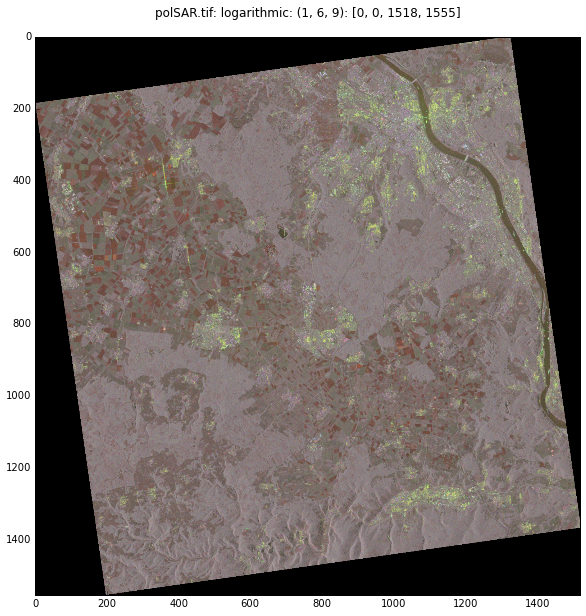

In [4]:
run /sar/dispms -p [1,6,9] -f /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3//polSAR.tif

The scene above was acquired over the city of Bonn, Germany (upper right hand corner with the Rhine river). The gray, featurless areas are mixed forest. We will run the __enlml.py__ (step 3 in the processing chain) script on a spatial subset which includes forested land cover. The spatial subset is entered with the -d flag as the list 

[upper left column, upper left row, number of columns, number of rows]

Here we choose -d [800,400,500,500]:

     ENL Estimation
Tue Jun 16 07:44:11 2015
infile:  /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3//polSAR.tif
Quad polarimetry
filtering...
row:  100  200  300  400 

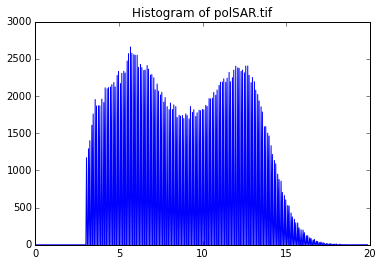


Mode: 5.6913998909
ENL image written to: /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_enl.tif
elapsed time: 71.0568621159


In [5]:
run enlml -d [800,400,500,500] /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3//polSAR.tif

There are two modes (maxima) at about 6 and 12 looks. Here is the ENL image

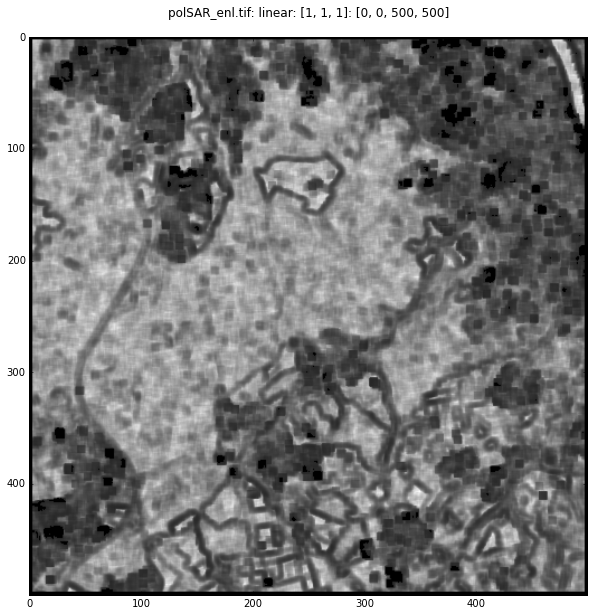

In [8]:
run dispms -e 2 -f /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_enl.tif

The bright areas correspond to mixed forest (around 12 equivalent looks) and allow for the best estimate of the ENL, see 
<a href="http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=5071293&url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel5%2F36%2F5291960%2F05071293.pdf%3Farnumber%3D5071293">Anfinsen et al. (2009)</a>.

Next we geocode another of the Radarsat-2 images, the one acquired on May 20, 2010 (20100520):

In [3]:
!./mapready.sh 20100520 rs2quad

Geocoding polSARpro multilook polarimetric matrix image with mapready ...
Original SLC image dimensions:      rows 5538  cols 3788
After multi-looking with polSARpro: rows 1384  cols 1262
Azimuth looks: 4
Range looks:   3
***** processing polSARpro polarimetric matrix image:
***** /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC
***** ...
***** Done, see mapready.log
***** Combining into a single image file ...
     Ingest SAR
Fri Jun 19 09:31:55 2015
Directory /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC_MapReady/T3/
writing band 1
writing band 2
writing band 3
writing band 4
writing band 5
writing band 6
writing band 7
writing band 8
writing band 9
elapsed time: 31.0119628906
Multiband image is /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif


ENL estimation gives a very similar result:

     ENL Estimation
Fri Jun 19 09:41:04 2015
infile:  /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC_MapReady/T3//polSAR.tif
Quad polarimetry
filtering...
row:  100  200  300  400 

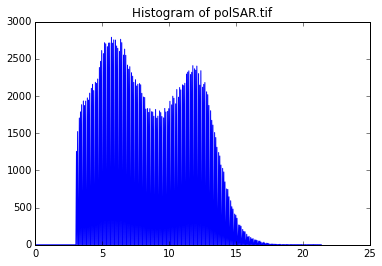

 ENL image written to: /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_enl.tif
elapsed time: 63.8191490173


In [6]:
run enlml -d [800,400,500,500] /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC_MapReady/T3//polSAR.tif

Finally, we can perform the last processing step, polSAR cahnge detection. The bash script __wishart.sh__ needs five input parameters, the two acquistion times in yyymmdd format, a spatial subset, and the two ENL values:

In [15]:
!./wishart.sh 20100426 20100520 [400,400,1000,1000] 12.0 12.0

***** PolSAR Change Detection
 
***** registering ...
     Register SAR
Tue Jun 16 08:07:34 2015
Reference image: /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif
Target image: /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif
warping 9 bands (quad pol)...
elapsed time: 26.153416872
Warped image written to: /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_warp.tif
***** complex Wishart change detection ...
Complex Wishart Change Detection
Tue Jun 16 08:08:00 2015
first filename:  /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif
number of looks: 12.000000
second filename:  /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_warp.tif
number of looks: 12.000000
Quad polarimetry
test statistic and change probabilities written to: /sar/imagery/RS2_OK54

Here is the change map image generated by the above script:

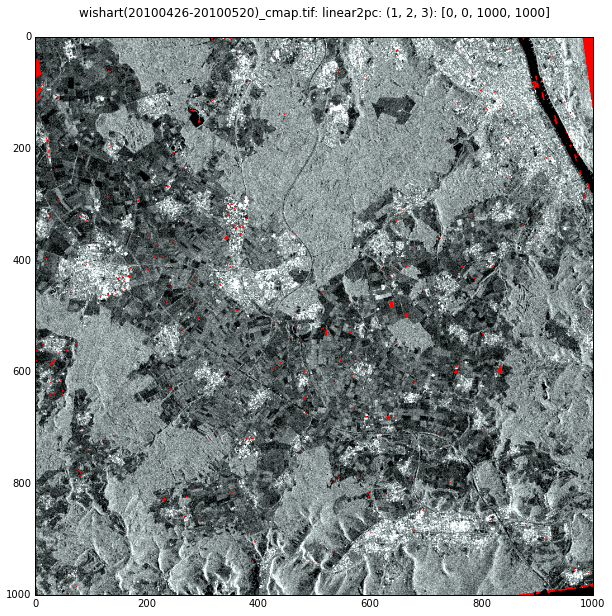

In [18]:
run dispms -e 3 -p [1,2,3] -f /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/wishart(20100426-20100520)_cmap.tif

Over the short interval of less than a month separating the two acquisitions there are relatively few significant changes, mostly in the agricultural areas near center right and upper left. Barge movements on the Rhine river are clearly evident. Zooming in on the upper left hand corner we can see a flooded  sand quarry pit with two dredging arms that are in continual motion, giving rise to significant change signals.

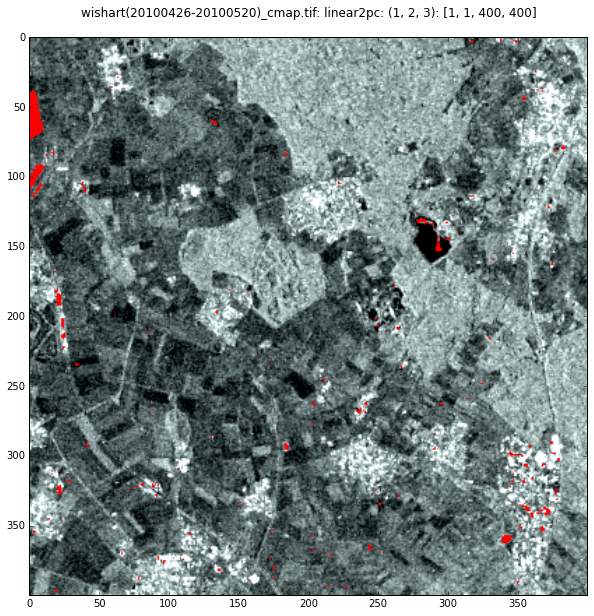

In [20]:
run dispms -e 3 -p [1,2,3] -d [1,1,400,400] -f /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/wishart(20100426-20100520)_cmap.tif

Finally, here is a close-up of the southern part of Bonn and the Rhine:

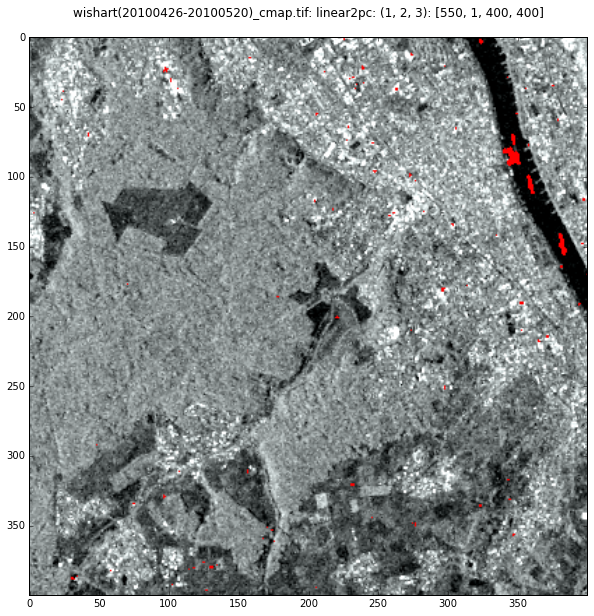

In [22]:
run dispms -e 3 -p [1,2,3] -d [550,1,400,400] -f /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/wishart(20100426-20100520)_cmap.tif